In [1]:
import urllib.request
import json
import pandas as pd

In [2]:
url = "https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=00cb82265e4be93fe9f393b7530f025b"
response = urllib.request.urlopen(url)
data = response.read().decode('UTF-8')

In [3]:
print(data)

{"cod":"200","message":0,"cnt":40,"list":[{"dt":1713333600,"main":{"temp":278.58,"feels_like":278.58,"temp_min":278.58,"temp_max":279.99,"pressure":1006,"sea_level":1006,"grnd_level":938,"humidity":87,"temp_kf":-1.41},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":97},"wind":{"speed":1.15,"deg":306,"gust":1.8},"visibility":10000,"pop":0,"sys":{"pod":"d"},"dt_txt":"2024-04-17 06:00:00"},{"dt":1713344400,"main":{"temp":281.51,"feels_like":280.64,"temp_min":281.51,"temp_max":283.33,"pressure":1006,"sea_level":1006,"grnd_level":938,"humidity":73,"temp_kf":-1.82},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":100},"wind":{"speed":1.78,"deg":352,"gust":1.72},"visibility":10000,"pop":0,"sys":{"pod":"d"},"dt_txt":"2024-04-17 09:00:00"},{"dt":1713355200,"main":{"temp":286.62,"feels_like":285.28,"temp_min":286.62,"temp_max":286.62,"pressure":1004,"sea_level":1004,"grnd_level":937,"humidity":

In [4]:
json_data = json.loads(data)
print(json_data)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1713333600, 'main': {'temp': 278.58, 'feels_like': 278.58, 'temp_min': 278.58, 'temp_max': 279.99, 'pressure': 1006, 'sea_level': 1006, 'grnd_level': 938, 'humidity': 87, 'temp_kf': -1.41}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 97}, 'wind': {'speed': 1.15, 'deg': 306, 'gust': 1.8}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-04-17 06:00:00'}, {'dt': 1713344400, 'main': {'temp': 281.51, 'feels_like': 280.64, 'temp_min': 281.51, 'temp_max': 283.33, 'pressure': 1006, 'sea_level': 1006, 'grnd_level': 938, 'humidity': 73, 'temp_kf': -1.82}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 1.78, 'deg': 352, 'gust': 1.72}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-04-17 09:00:00'}, {'dt': 1713355200, 'main': {'temp': 286.62, 'feels_

In [5]:
print(json_data["list"][0])
print(json_data["list"][0]["weather"][0]["main"])

{'dt': 1713333600, 'main': {'temp': 278.58, 'feels_like': 278.58, 'temp_min': 278.58, 'temp_max': 279.99, 'pressure': 1006, 'sea_level': 1006, 'grnd_level': 938, 'humidity': 87, 'temp_kf': -1.41}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 97}, 'wind': {'speed': 1.15, 'deg': 306, 'gust': 1.8}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-04-17 06:00:00'}
Clouds


In [6]:
attributes = [[list["main"]["humidity"], list["main"]["sea_level"], list["main"]["temp"], list["wind"]["speed"], list["weather"][0]["main"], list["dt_txt"]] for list in json_data["list"]]
columns = ['humidity', 'sea_level', 'temp','wind_speed', "weather", "date"]
weather_df = pd.DataFrame(attributes, columns=columns)


In [7]:
print(attributes)

[[87, 1006, 278.58, 1.15, 'Clouds', '2024-04-17 06:00:00'], [73, 1006, 281.51, 1.78, 'Clouds', '2024-04-17 09:00:00'], [48, 1004, 286.62, 3.7, 'Rain', '2024-04-17 12:00:00'], [44, 1003, 287.1, 2.64, 'Rain', '2024-04-17 15:00:00'], [70, 1005, 281.31, 1.12, 'Rain', '2024-04-17 18:00:00'], [79, 1006, 279.29, 3.18, 'Rain', '2024-04-17 21:00:00'], [86, 1007, 278.47, 0.36, 'Rain', '2024-04-18 00:00:00'], [94, 1007, 278.46, 2.09, 'Rain', '2024-04-18 03:00:00'], [93, 1008, 279.32, 0.94, 'Clouds', '2024-04-18 06:00:00'], [80, 1009, 281.9, 2.74, 'Rain', '2024-04-18 09:00:00'], [90, 1010, 280.53, 3.13, 'Rain', '2024-04-18 12:00:00'], [83, 1009, 280.89, 3.47, 'Rain', '2024-04-18 15:00:00'], [89, 1011, 279.3, 1.82, 'Rain', '2024-04-18 18:00:00'], [94, 1014, 278.34, 1.76, 'Rain', '2024-04-18 21:00:00'], [99, 1016, 277.01, 2.03, 'Rain', '2024-04-19 00:00:00'], [99, 1017, 276.7, 1.82, 'Clouds', '2024-04-19 03:00:00'], [93, 1018, 278.17, 1.43, 'Clouds', '2024-04-19 06:00:00'], [61, 1017, 283.71, 1.3, '

In [8]:
weather_df.head(10)

,humidity,sea_level,temp,wind_speed,weather,date
0,87,1006,278.58,1.15,Clouds,2024-04-17 06:00:00
1,73,1006,281.51,1.78,Clouds,2024-04-17 09:00:00
2,48,1004,286.62,3.70,Rain,2024-04-17 12:00:00
3,44,1003,287.10,2.64,Rain,2024-04-17 15:00:00
4,70,1005,281.31,1.12,Rain,2024-04-17 18:00:00
5,79,1006,279.29,3.18,Rain,2024-04-17 21:00:00
6,86,1007,278.47,0.36,Rain,2024-04-18 00:00:00
7,94,1007,278.46,2.09,Rain,2024-04-18 03:00:00
8,93,1008,279.32,0.94,Clouds,2024-04-18 06:00:00
9,80,1009,281.90,2.74,Rain,2024-04-18 09:00:00


In [11]:
# Saving the data into the csv file
weather_df.to_csv('/content/weather_data.csv')

Text(0.5, 1.0, 'Weather')

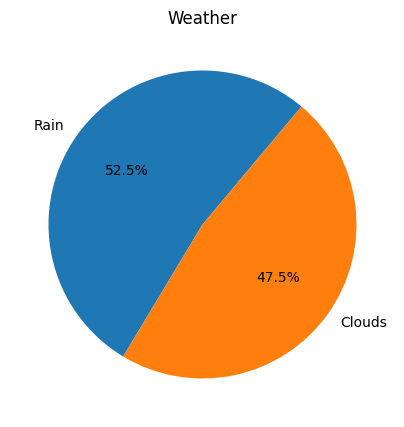

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
weather_counts = weather_df["weather"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=50)
plt.title('Weather')

Text(0, 0.5, 'Frequency')

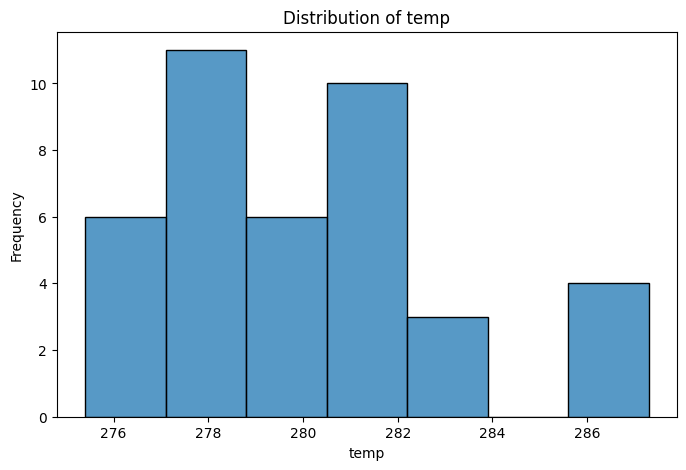

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(weather_df['temp'])
plt.title('Distribution of temp')
plt.xlabel('temp')
plt.ylabel('Frequency')